In [81]:
import numpy as np

from tensorflow.keras import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Conv2DTranspose, UpSampling2D

import matplotlib.pyplot as plt

Encoder portion of autoencoder:

In [108]:
encoder = Sequential()

encoder.add(Conv2D(32, (2,2), strides = 2, activation = 'relu', padding = 'same', input_shape = (256,256,3)))
encoder.add(MaxPool2D((2,2), padding = 'same'))
encoder.add(Conv2D(16, (2,2), strides = 2, activation = 'relu', padding = 'same'))
encoder.add(MaxPool2D((2,2), padding = 'same'))

#encoder.compile(loss = 'binary_crossentropy', metrics = 'accuracy')
print(encoder.summary())

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________
None


Decoder

In [110]:
decoder = Sequential()

decoder.add(Conv2DTranspose(16, (2,2), strides = 2, activation = 'relu', input_shape = (16,16,16)))
decoder.add(UpSampling2D((2,2)))
decoder.add(Conv2DTranspose(16, (2,2), strides = 2, activation = 'relu'))
decoder.add(UpSampling2D((2,2)))
#decoder.add(Conv2DTranspose(9, (2,2), strides = 2, activation = 'relu'))
decoder.add(Dense(3, activation = 'sigmoid'))

decoder.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
print(decoder.summary())

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_103 (Conv2  (None, 32, 32, 16)       1040      
 DTranspose)                                                     
                                                                 
 up_sampling2d_19 (UpSamplin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_104 (Conv2  (None, 128, 128, 16)     1040      
 DTranspose)                                                     
                                                                 
 up_sampling2d_20 (UpSamplin  (None, 256, 256, 16)     0         
 g2D)                                                            
                                                                 
 dense_28 (Dense)            (None, 256, 256, 3)     

Autoencoder:

In [111]:
encoder_input = Input((256,256,3))
decoder_output = decoder(encoder(encoder_input))

autoencoder = Model(encoder_input, decoder_output)

autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [112]:
autoencoder.fit(x_train[0:240], x_train[0:240], batch_size = 1, epochs = 8)

Epoch 1/8
240/240 [==============================] - 3s 13ms/step - loss: 0.6626 - accuracy: 0.4012
Epoch 2/8
240/240 [==============================] - 3s 13ms/step - loss: 0.6092 - accuracy: 0.4672
Epoch 3/8
240/240 [==============================] - 3s 13ms/step - loss: 0.6012 - accuracy: 0.6496
Epoch 4/8
240/240 [==============================] - 3s 13ms/step - loss: 0.5999 - accuracy: 0.6678
Epoch 5/8
240/240 [==============================] - 3s 13ms/step - loss: 0.5995 - accuracy: 0.6679
Epoch 6/8
240/240 [==============================] - 3s 13ms/step - loss: 0.5993 - accuracy: 0.6661
Epoch 7/8
240/240 [==============================] - 3s 13ms/step - loss: 0.5990 - accuracy: 0.6681
Epoch 8/8
240/240 [==============================] - 3s 13ms/step - loss: 0.5989 - accuracy: 0.6734


Autoencoder applied to 10 images from Test set:

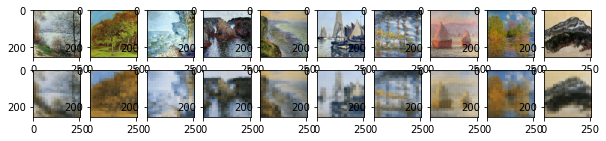

In [113]:
n = 10 # n <= 60

encode_decode = autoencoder(x_test[:n])

f, a = plt.subplots(2, 10, figsize=(n, 2))
for i in range(n):
    a[0][i].imshow(np.reshape(x_test[i], (256,256,3)))
    a[1][i].imshow(np.reshape(encode_decode[i], (256,256,3)))

Decoder applied to random normal noise:

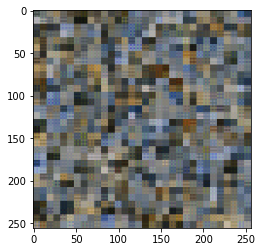

In [124]:
noise = np.random.normal(size=(1,16,16,16))
generated = decoder(noise)

plt.imshow(np.reshape(generated, (256,256,3)))

Decoder applied to random uniform noise:

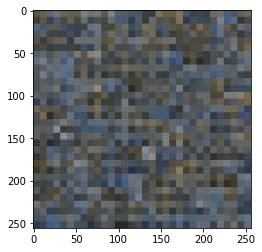

In [123]:
noise = np.random.randint(0, 256, size=(1,16,16,16))
noise = noise/255
generated = decoder(noise)

plt.imshow(np.reshape(generated, (256,256,3)))